# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.regularizers import l1
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
#LOAD THE DATA
print("Loading and preprocessing data...")
df = pd.read_csv('Water_potability.csv')
df = df.fillna(df.mean())
df.head()

Loading and preprocessing data...


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Plot the Data Appropriately

In [5]:
# Data splitting
X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)



In [6]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Data Visualization Functions
def plot_data_distribution():
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()

    for idx, column in enumerate(X.columns):
        sns.histplot(data=df, x=column, hue='Potability', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

In [8]:

def plot_correlation_matrix():
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()

# L1 Regularization model

*   List item
*   List item



In [22]:

# Define the model with L2 regularization and Dropout
def create_l1_regularized_model(l1_lambda=0.01, dropout_rate=0.5):
    model = Sequential()

    # First Convolutional Layer with L2 regularization and Dropout
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(9, 1),
                     kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(dropout_rate))

    # Second Convolutional Layer with L2 regularization and Dropout
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                     kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    model.add(Dropout(dropout_rate))

    # Flatten the data
    model.add(Flatten())

    # Fully Connected Layer with L1 regularization and Dropout
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=l1(l1_lambda), bias_regularizer=l1(l1_lambda)))
    model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = RMSprop(learning_rate=0.001, rho=0.9)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and compile the L1 regularized model with Dropout
l1_model = create_l1_regularized_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = l1_model.fit(X_train, y_train, epochs=40, batch_size=32,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping])

l1_model.save('L1_model.h5')

# Evaluate the model
test_loss, test_accuracy = l1_model.evaluate(X_test, y_test)
print(f"L1 Regularized Model with Dropout - Test Accuracy: {test_accuracy * 100:.2f}%")



Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5173 - loss: 923.9250 - val_accuracy: 0.6220 - val_loss: 27.7486
Epoch 2/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5062 - loss: 230.4946 - val_accuracy: 0.6199 - val_loss: 8.0287
Epoch 3/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5650 - loss: 50.3172 - val_accuracy: 0.6220 - val_loss: 7.6956
Epoch 4/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5878 - loss: 18.4051 - val_accuracy: 0.6220 - val_loss: 6.5820
Epoch 5/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6169 - loss: 10.9334 - val_accuracy: 0.6220 - val_loss: 4.9388
Epoch 6/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6014 - loss: 8.4744 - val_accuracy: 0.6220 - val_loss: 3.8905
Epoch 7/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5850 - loss: 5.8433 - val_accuracy: 0.6220 - val_loss: 3.2692
Epoch 8/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5948 - loss: 4.4776 - val_accuracy: 0.6220 - val_loss: 2.

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6450 - loss: 0.7058 
L1 Regularized Model with Dropout - Test Accuracy: 62.20%


## confusion matrix


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion Matrix:
[[306   0]
 [186   0]]


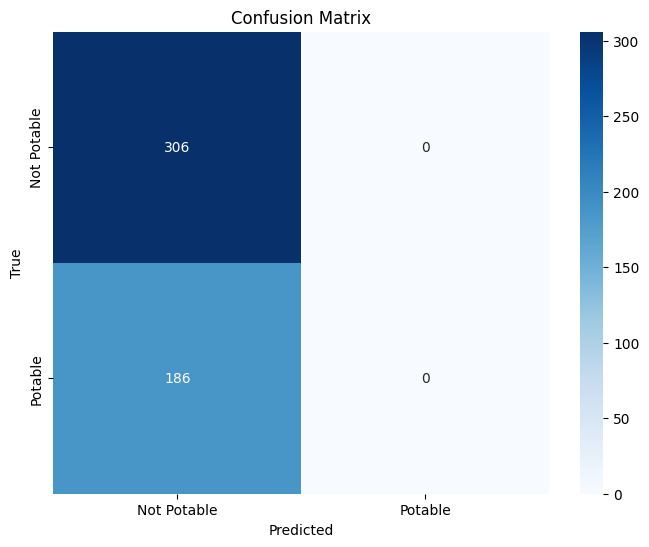

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Predict labels for the test set
y_pred = l1_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Convert probabilities to binary values (0 or 1)
y_pred_classes = np.round(y_pred).astype(int)  # Convert predictions to 0 or 1

# Compute and Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

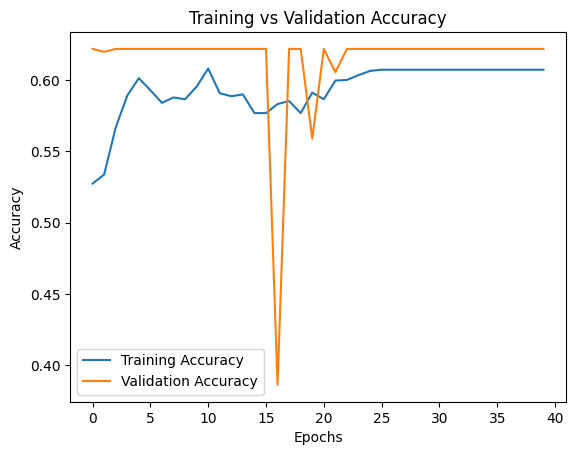

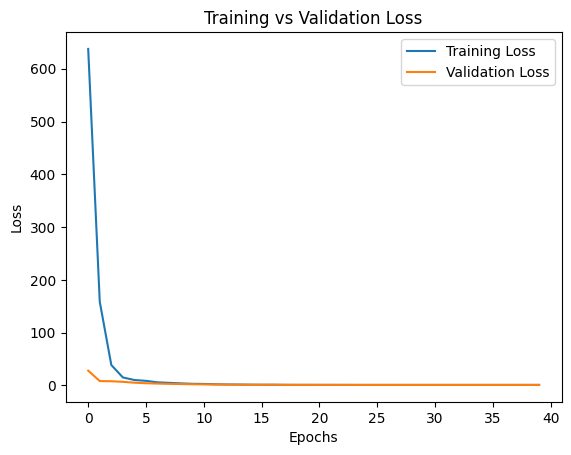

In [28]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()